# Multiple CiteSeer visualizations
In this tutorial, we will visualize the CiteSeer graph using all of the available embedding methods that can embed Cora.

This will exclude methods that require edge types and weights.

## Retrieving the graph

In [1]:
from grape.datasets.linqs import CiteSeer
graph = CiteSeer()

In this version of CiteSeer, we have integrated the words data.

Generally, in the embedding of CiteSeer, the words information is excluded and used in classifier models down the line.

In [2]:
from grape.datasets.linqs import get_words_data

graph, _ = get_words_data(graph)

/home/luca/anaconda3/lib/python3.9/site-packages/ensmallen/datasets/linqs.py:259: UserWarning: Note that some nodes did not come with node features! As requested, these nodes will be removed. If you want to change this behaviour, set the `remove_nodes_without_features` parameter to false.
Specifically, the names of the nodes without features are:
	tobies99pspace
	weng95shoslifn
	293457
	hahn98ontology
	nielsen00designing
	95786
	38137
	kohrs99using
	gabbard97taxonomy
	ghani01hypertext
	flach99database
	khardon99relational
	raisamo99evaluating
	wang01process
	197556
  warnings.warn(


We drop the singleton nodes:

In [3]:
graph = graph.remove_disconnected_nodes()

To get the graph report, just run:

In [4]:
graph

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>CiteSeer</h2><p class="paragraph">The undirected graph CiteSeer has 3.26K heterogeneous nodes and 4.61K edges. The graph contains 390 connected components, with the largest one containing 2.11K nodes and the smallest one containing 2 nodes. The RAM requirements for the nodes and edges data structures are 332.06KB and 14.67KB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 1, the maximum node degree is 99, the mode degree is 1, the mean degree is 2.80 and the node degree median is 2.</p><p class="paragraph">The nodes with the highest degree centrality are brin98anatomy (degree 99 and node type IR), rao95bdi (degree 51 and node type Agents), chakrabarti98automatic (degree 35 and node type IR), bharat98improved (degree 34 and node type IR) and lawrence98searching (degree 30 and node type IR).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 6 node types, which are DB (681 nodes, 20.86%), IR (666 nodes, 20.40%), Agents (590 nodes, 18.08%), ML (585 nodes, 17.92%), HCI (502 nodes, 15.38%) and AI (240 nodes, 7.35%). The RAM requirement for the node types data structure is 170.25KB.</p><h3 style="margin: 1em 0 0 0;">Topological Oddities</h3><p class="paragraph">A topological oddity is a set of nodes in the graph that <i>may be derived</i> by an error during the generation of the edge list of the graph and, depending on the task, could bias the results of topology-based models. In the following paragraph, we will describe the detected topological oddities.</p><h4 style="margin: 1em 0 0 0;">Node tuples</h4><p class="paragraph">A node tuple is a connected component composed of two nodes. We have detected 252 node tuples in the graph, involving a total of 504 nodes (15.44%) and 252 edges (2.75%). The detected node tuples are:</p><ul class="medium-columns"><li><p class="paragraph">Node tuple containing the nodes zhang99situated (node type ML) and zhang99towards (node type IR).</p></li>
<li><p class="paragraph">Node tuple containing the nodes zhang01evolutionary (node type DB) and zhang99evolving (node type ML).</p></li>
<li><p class="paragraph">Node tuple containing the nodes wolski00design (node type DB) and wolski98fuzzy (node type ML).</p></li>
<li><p class="paragraph">Node tuple containing the nodes wills00open (node type ML) and wills01open (node type ML).</p></li>
<li><p class="paragraph">Node tuple containing the nodes vilalta00quantification (node type ML) and vilalta01rule (node type ML).</p></li>
<li><p class="paragraph">Node tuple containing the nodes vazov01system (node type IR) and wonsever01contextual (node type IR).</p></li>
<li><p class="paragraph">Node tuple containing the nodes vasconcelos00bayesian (node type ML) and vasconcelos99probabilistic (node type ML).</p></li>
<li><p class="paragraph">Node tuple containing the nodes valencia98algebraic (node type AI) and valencia98hitch (node type AI).</p></li>
<li><p class="paragraph">Node tuple containing the n

## Sorting the graph by decreasing node degree
Some of the TensorFlow embedding models use the TensorFlow NCE method, which requires the nodes to be sorted by occurrence.

In [5]:
graph = graph.sort_by_decreasing_outbound_node_degree()

## Splitting into training and test set

In [6]:
train, test = graph.get_node_label_holdout_graphs(train_size=0.7)
train.enable()

## Retrieving the available embedding methods

In [11]:
from grape import get_available_models_for_node_embedding

all_embedding_methods = get_available_models_for_node_embedding()
embedding_methods = all_embedding_methods[
    (~all_embedding_methods.requires_edge_types.astype(bool)) &
    (~all_embedding_methods.requires_edge_weights.astype(bool))
]

# We remove some models that either require some additional
# information or are simply currently work in progress.
embedding_methods = embedding_methods[
    ~embedding_methods.model_name.str.contains("SPINE") &
    ~embedding_methods.model_name.str.contains("WINE") &
    ~embedding_methods.model_name.str.contains("Laplacian Eigenmaps")
]

## Running the visualizations

Computing embedding:   0%|          | 0/34 [00:00<?, ?it/s]

/home/luca/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


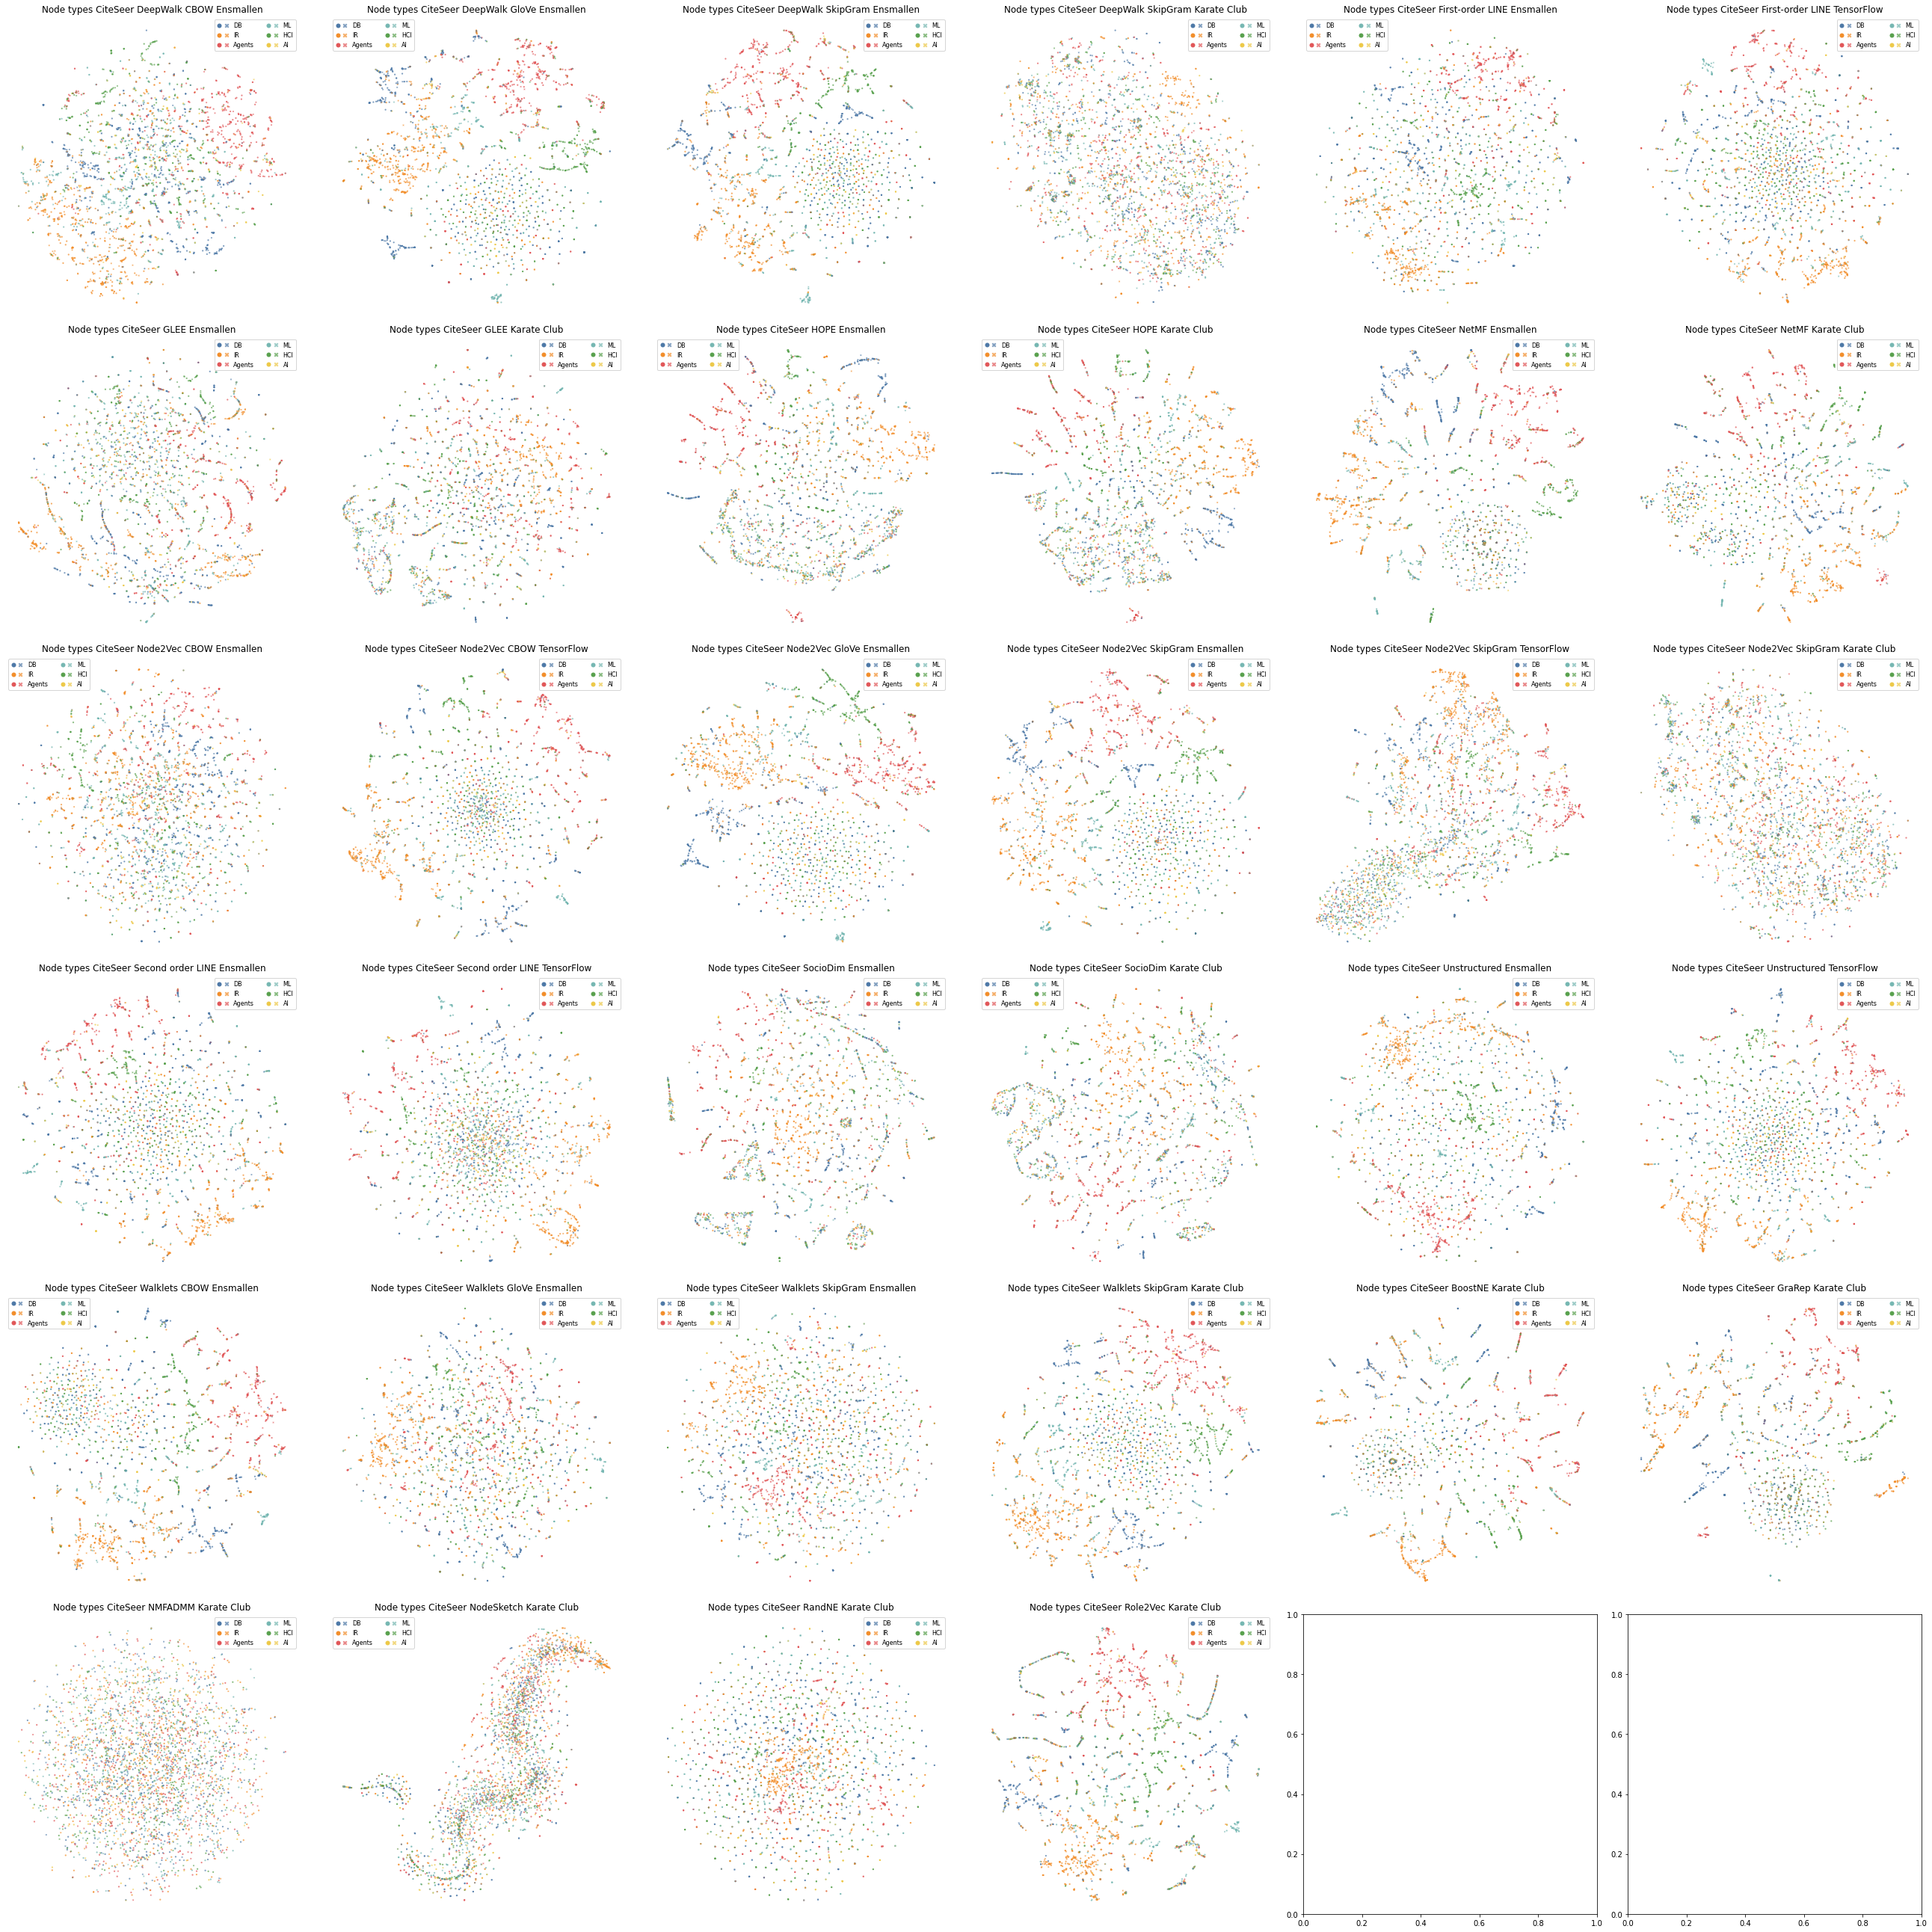

In [12]:
import silence_tensorflow.auto
from grape import GraphVisualizer
from grape.utils import AbstractEmbeddingModel
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from math import ceil

ncols = 6
nrows = ceil(embedding_methods.shape[0] / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 6*nrows))

for index, (_, row) in tqdm(
    enumerate(embedding_methods.iterrows()),
    total=embedding_methods.shape[0],
    desc="Computing embedding"
):
    model = AbstractEmbeddingModel.get_model_from_library(
        model_name=row.model_name,
        library_name=row.library_name
    )(enable_cache=True)
    embedding = model.fit_transform(train)
    vis = GraphVisualizer(
        graph,
        node_embedding_method_name=f"{row.model_name} {row.library_name}",
        automatically_display_on_notebooks=False
    )
    vis.fit_nodes(embedding)
    vis.plot_node_types(
        figure=fig,
        axes=axes[index // ncols, index % ncols],
        train_indices=train.get_node_ids_with_known_node_types(),
        test_indices=test.get_node_ids_with_known_node_types()
    )
fig.tight_layout()
plt.show()